In [4]:
# import modules
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#load data and view head
data=pd.read_excel("EastWestAirlines (1).xlsx", sheet_name="data") 
data.head() 

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


# Min Max 

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
data = data.iloc[:,:1]

In [10]:
norm = MinMaxScaler()


In [12]:
norm.fit(data)


MinMaxScaler()

In [15]:
norm_data = norm.transform(data)
print(norm_data)


[[0.00000000e+00]
 [2.48756219e-04]
 [4.97512438e-04]
 ...
 [9.99502488e-01]
 [9.99751244e-01]
 [1.00000000e+00]]


In [17]:
type(norm_data)


numpy.ndarray

In [19]:

from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [21]:
k_mean = list(range(2,20))


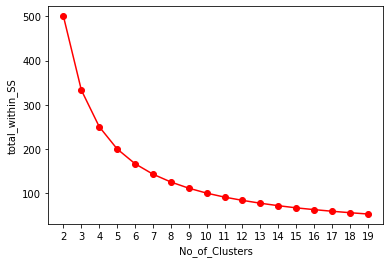

In [31]:
k_mean
TWSS = [] # variable for storing total within sum of squares for each kmeans 
for i in k_mean:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(norm_data)
    WSS = [] # variable for storing within sum of squares for each cluster  
    for j in range(i):
       j
       WSS.append(sum(cdist(norm_data[kmeans.labels_==j,:],
        kmeans.cluster_centers_[j].reshape(1,norm_data.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))    

plt.plot(k_mean,TWSS, 'ro-')
plt.xlabel("No_of_Clusters")
plt.ylabel("total_within_SS")
plt.xticks(k_mean)
plt.show()

###### now considering number of clusters =4 as analysed in the elbow plot



In [25]:
model = KMeans(n_clusters = 5)
model.fit(norm_data)


KMeans(n_clusters=5)

In [27]:
model.labels_
series_array=pd.Series(model.labels_)
data["clust"]=series_array
cluster1 =data.iloc[:,1:11].groupby(data.clust).mean()

In [29]:
cluster1

,clust
clust,
0,0
1,1
2,2
3,3
4,4


In [30]:
data.head()

,ID#,clust
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
